## 1-16. Who survived the shiwreck of the Titanic?

[Link to dataset](https://www.kaggle.com/c/titanic)

### Lets start by importing commonly used libraries

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline
from sklearn.preprocessing import normalize

## Lets read our dataset into two pandas dataframes

In [9]:
train = pd.DataFrame(pd.read_csv('./Datasets/Titanic/train.csv'))
test = pd.DataFrame(pd.read_csv('./Datasets/Titanic/test.csv'))
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


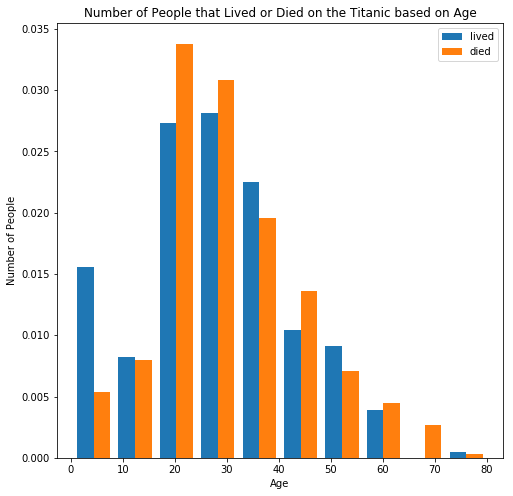

In [96]:
plt.figure(figsize=(8,8))
train.Age.fillna(0)


    
livedAge = train[(train['Age'] > 0) & (train['Survived'] == 1)]['Age']
diedAge = train[(train['Age'] > 0) & (train['Survived'] == 0)]['Age']


plt.hist([livedAge,diedAge],label=['lived','died'],normed=True)
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.title('Number of People that Lived or Died on the Titanic based on Age')
plt.legend()
plt.show()

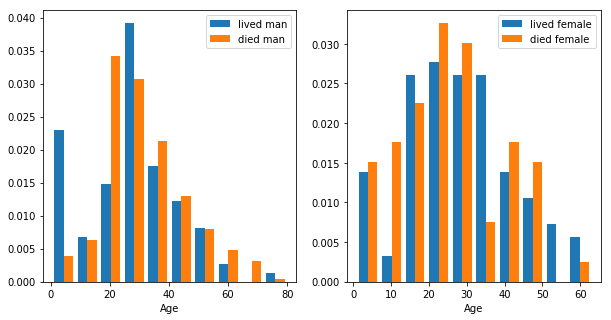

In [256]:
livedMen = train[(train['Sex'] == 'male') & (train['Survived'] == 1) & (train['Age'] > 0)]['Age']
diedMen = train[(train['Sex'] == 'male') & (train['Survived'] == 0) & (train['Age'] > 0)]['Age']
livedFemale = train[(train['Sex'] == 'female') & (train['Survived'] == 1) & (train['Age'] > 0)]['Age']
diedFemale = train[(train['Sex'] == 'female') & (train['Survived'] == 0) & (train['Age'] > 0)]['Age']

f,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].hist([livedMen, diedMen],label=['lived man','died man'],normed=True)
ax[0].set_xlabel('Age')
ax[0].legend()

ax[1].hist([livedFemale, diedFemale],label=['lived female', 'died female'],normed=True)
ax[1].legend()
ax[1].set_xlabel('Age')
plt.show()



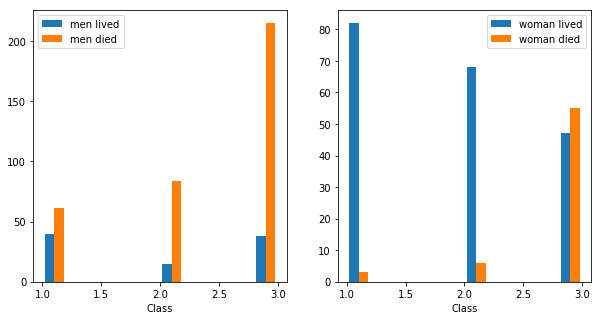

In [255]:
diedMenClass = train[(train['Sex'] == 'male') & (train['Survived'] == 0) & (train['Age'] > 0)]['Pclass']
livedMenClass = train[(train['Sex'] == 'male') & (train['Survived'] == 1) & (train['Age'] > 0)]['Pclass']

diedWoMenClass = train[(train['Sex'] == 'female') & (train['Survived'] == 0) & (train['Age'] > 0)]['Pclass']
livedWoMenClass = train[(train['Sex'] == 'female') & (train['Survived'] == 1) & (train['Age'] > 0)]['Pclass']

f, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].hist([diedMenClass,livedMenClass][::-1],label=['men died','men lived'][::-1],normed=False)
ax[0].set_xlabel('Class')
ax[0].legend()

ax[1].hist([diedWoMenClass,livedWoMenClass][::-1],label=['woman died','woman lived'][::-1],normed=False)
ax[1].legend()
ax[1].set_xlabel('Class')
plt.show()

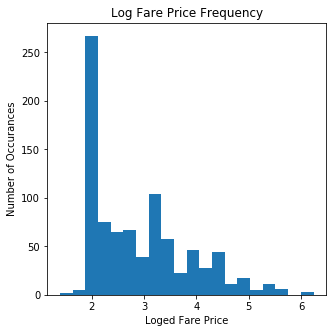

In [257]:
plt.figure(figsize=(5,5))
plt.hist(np.log(train[train['Fare'] > 0]['Fare']),bins=20)
plt.title('Log Fare Price Frequency')
plt.xlabel('Loged Fare Price')
plt.ylabel('Number of Occurances')
plt.show()

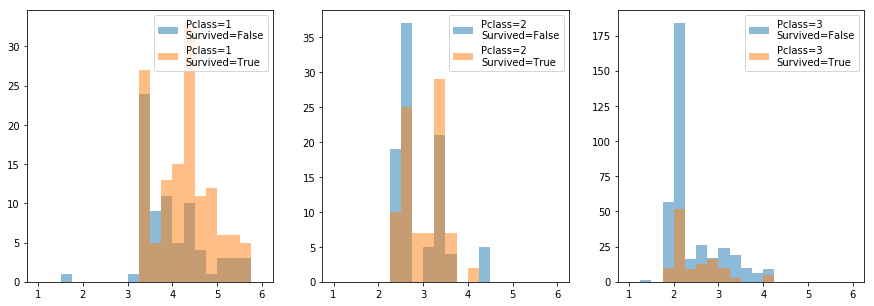

In [164]:
f, ax = plt.subplots(1,3, figsize=(15,5))
for i in range(1,4):
    for j in range(2):
        ax[i-1].hist(np.log(train[(train['Fare'] > 0) & (train['Pclass'] == i) & (train['Survived'] == j)]['Fare']),bins=20, range=[1,6],label='Pclass={}\nSurvived={}'.format(i,bool(j)), alpha=0.5, normed=False)    
        ax[i-1].legend()
plt.show()


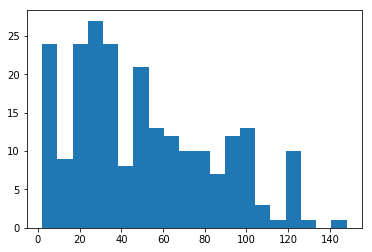

In [258]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder

tempTrain = train[train['Cabin'].notnull()]
cabins = train[train['Cabin'].notnull()]['Cabin']
cabins_fixed = []
for cab in cabins:
    temp = cab.split(' ')
    if len(temp) == 1:
        cabins_fixed.append(cab)
    else:
        for i in range(len(temp)):
            cabins_fixed.append(temp[i])

cabins_fixed = np.asarray(cabins_fixed)
cabin_letters = np.asarray([list(c)[0] for c in cabins_fixed])
cabin_numbers = []

for item in cabins_fixed:
    if len(item[1:]) > 0:
        cabin_numbers.append(float(item[1:]))

cabin_numbers = np.asarray(cabin_numbers)
# cabin_letters = LabelBinarizer().fit_transform(cabin_letters)

plt.hist(cabin_numbers,bins=20)
plt.show()

enc = LabelEncoder()
embarked = enc.fit_transform(train['Embarked'])

